# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERNSHIP"

## LGMVIP Aug-22
## Ayush Dilip Padvekar
## TASK 2- Stock Market Prediction And Forecasting Using Stacked LSTM

In this project, we will be working with the dataset of TATAGLOBAL stock. Keras, tensorflow and LSTM (Long Term Short Memory) model will be utilized in this project. We will be trying to determine the value of the following stock in its near future as well.

Dataset Link : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import array
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import calendar

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

### Loading Dataset

In [5]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'

In [7]:
df = pd.read_csv(url, parse_dates=True, index_col = "Date")

### Data Preprocessing

In [8]:
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [9]:
df.tail()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [10]:
df.shape

(2035, 7)

In [12]:
df.isnull().sum()

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2035 entries, 2018-09-28 to 2010-07-21
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  2035 non-null   float64
 1   High                  2035 non-null   float64
 2   Low                   2035 non-null   float64
 3   Last                  2035 non-null   float64
 4   Close                 2035 non-null   float64
 5   Total Trade Quantity  2035 non-null   int64  
 6   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 127.2 KB


In [14]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [18]:
data_close = df.reset_index()['Close']

In [19]:
data_close.shape

(2035,)

### Exploratory Data Analysis
### Line Plots

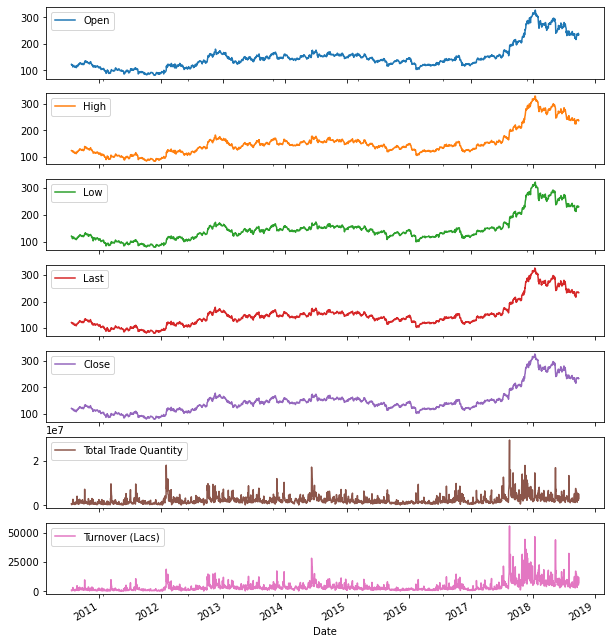

In [21]:
df.plot(subplots=True, figsize=(10, 12));

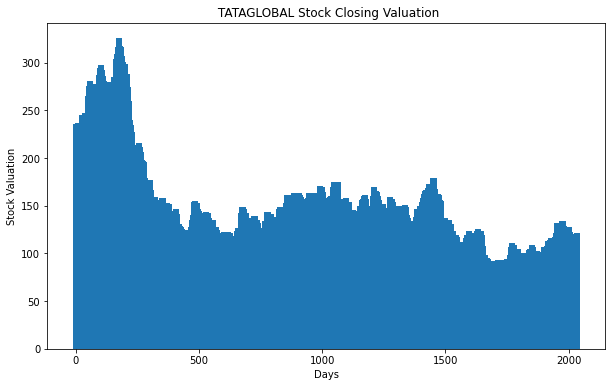

In [22]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.bar(data_close.index,
       data_close,
       width=25,
       align='center')
plt.xlabel('Days')
plt.ylabel('Stock Valuation')
plt.title(' TATAGLOBAL Stock Closing Valuation');

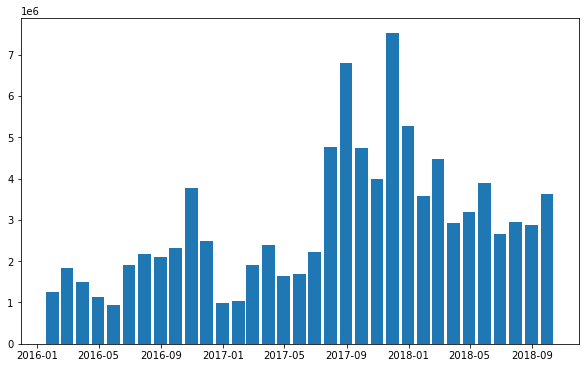

In [23]:
data_month = df.resample("M").mean()
fig, ax = plt.subplots(figsize=(10, 6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.bar(data_month['2016':].index, data_month.loc['2016':, "Total Trade Quantity"], width=25, align='center');

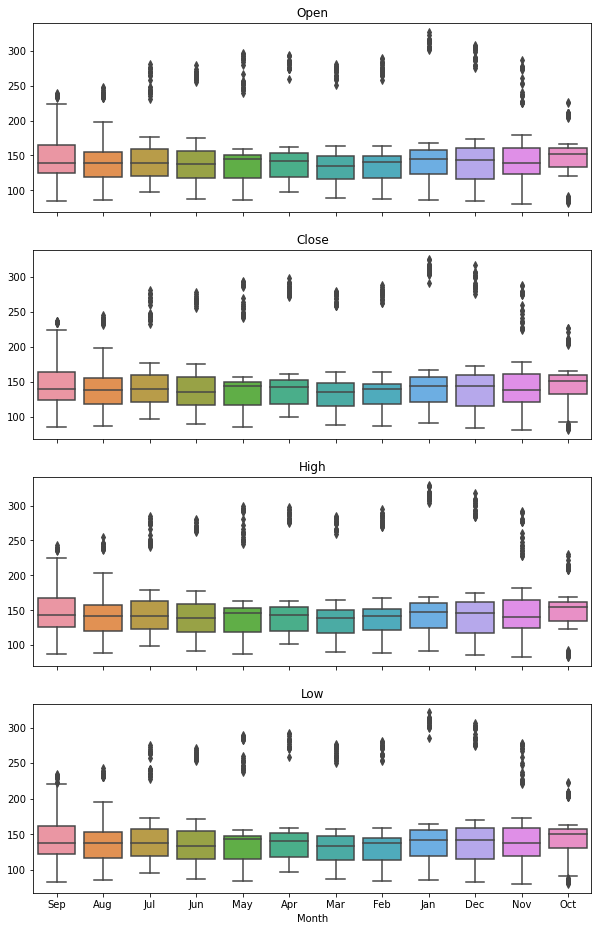

In [25]:
data_sub = df
data_sub['Date'] = df.index
data_sub['Month'] = data_sub['Date'].dt.strftime('%b')
fig, axes = plt.subplots(4, 1, figsize=(10, 16), sharex=True)
for name, ax in zip(['Open', 'Close', 'High', 'Low'], axes):
    sns.boxplot(data = data_sub, x='Month', y=name, ax=ax)
    ax.set_ylabel("")
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')

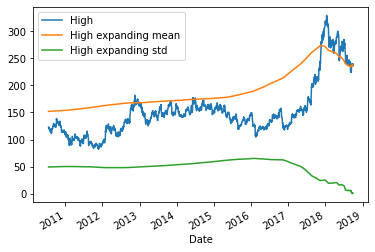

In [26]:
fig, ax = plt.subplots()
ax = df.High.plot(label='High')
ax = df.High.expanding().mean().plot(label='High expanding mean')
ax = df.High.expanding().std().plot(label='High expanding std')
ax.legend();

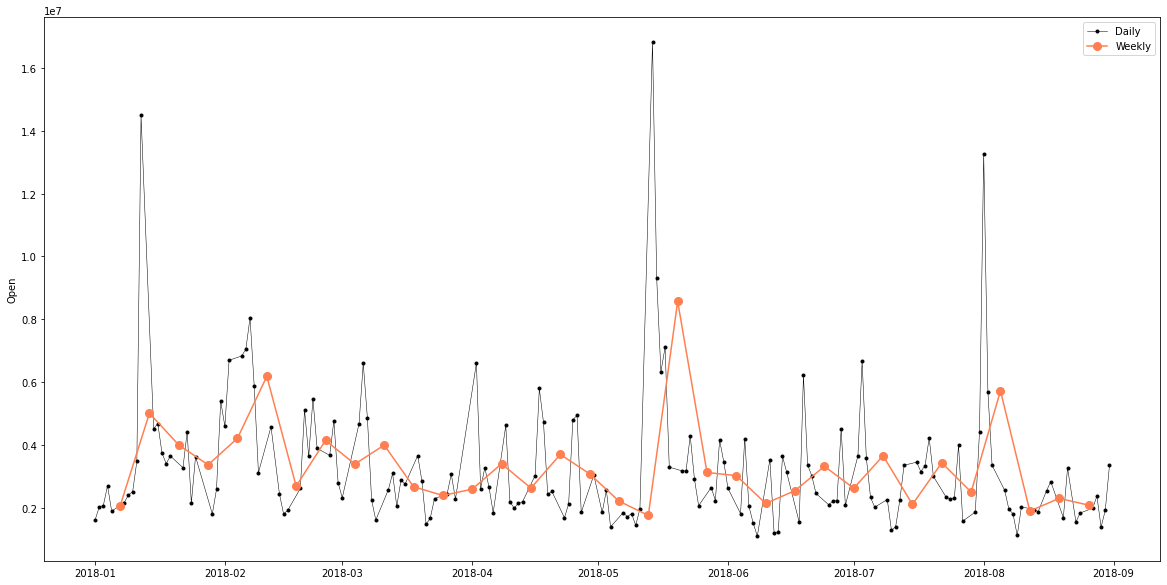

In [27]:
data_week = data_sub.resample("W").mean()
start, end = '2018-01', '2018-08'
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(data_sub.loc[start:end, 'Total Trade Quantity'], marker='.', linestyle='-', linewidth = 0.5, label='Daily', color='black')
ax.plot(data_week.loc[start:end, 'Total Trade Quantity'], marker='o', markersize=8, linestyle='-', label='Weekly', color='coral') 
ax.set_ylabel("Open")
ax.legend();

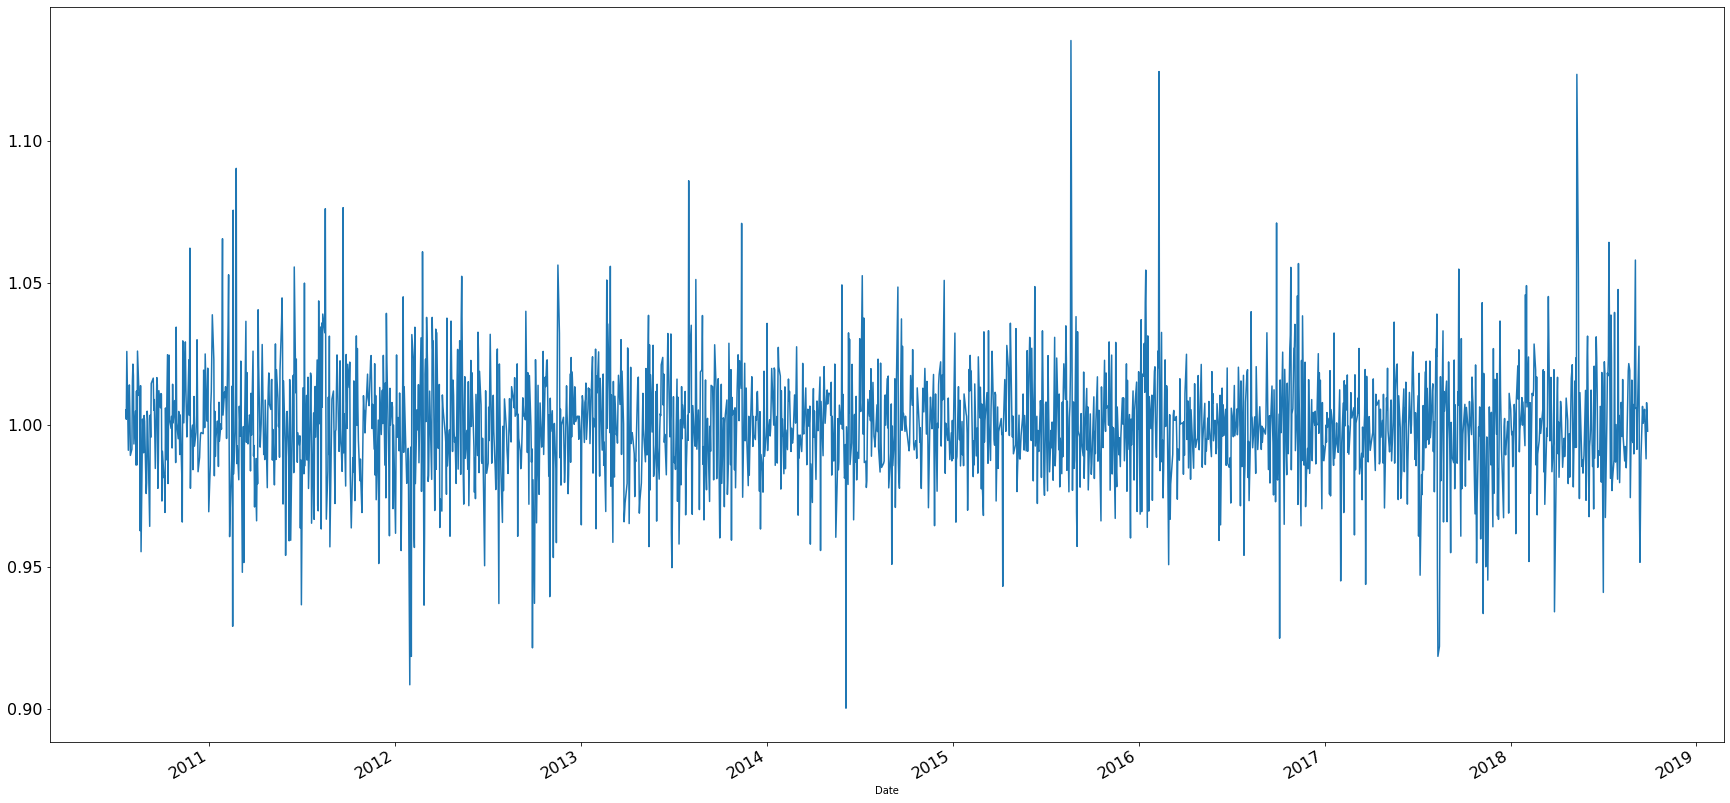

In [28]:
data['Change'] = df.Close.div(data.Close.shift())
data['Change'].plot(figsize=(30, 15), fontsize = 16);

C:\Users\padve\AppData\Local\Temp\ipykernel_9820\3082289441.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data['2018']['Change'].plot(figsize=(10, 6));


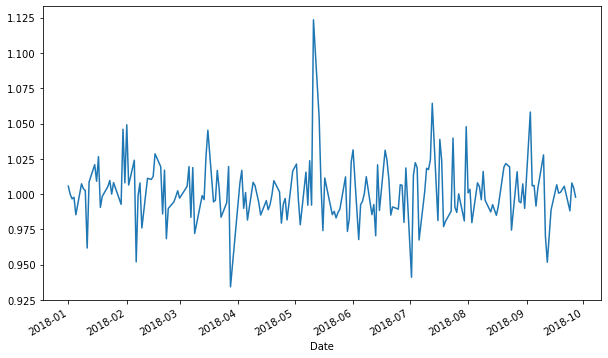

In [30]:
data['2018']['Change'].plot(figsize=(10, 6));

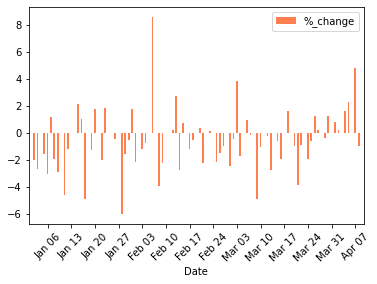

In [31]:
data_month.loc[:, '%_change'] = df.Close.pct_change()*100
fig, ax = plt.subplots()
data_month['%_change'].plot(kind='bar', color='coral', ax=ax)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)
ax.legend();

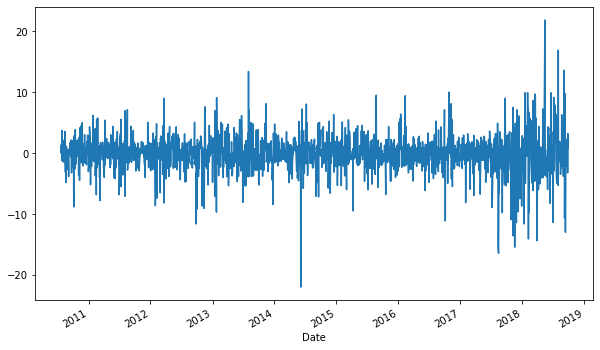

In [32]:
data.High.diff().plot(figsize=(10, 6));

In [33]:
data_sub

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Date,Month
Date,,,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,2018-09-28,Sep
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,2018-09-27,Sep
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,2018-09-26,Sep
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,2018-09-25,Sep
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,2018-09-24,Sep
...,...,...,...,...,...,...,...,...,...
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98,2010-07-27,Jul
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01,2010-07-26,Jul
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31,2010-07-23,Jul


In [34]:
data_sub['Year'] = data_sub['Date'].dt.strftime('%Y')
all_month_year_data = pd.pivot_table(data_sub, values="Open",
                                   index=["Month"],
                                   columns=["Year"],
                                   fill_value=0,
                                   margins=True)
named_index = [[calendar.month_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_data.index)]]
all_month_year_data = all_month_year_data.set_index(named_index)
all_month_year_data

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,All
Apr,0.000000,103.594444,118.412500,133.917500,153.772222,151.986842,120.447222,151.894444,280.211905,153.641776
Aug,115.077273,99.169048,130.645238,144.592500,154.042105,132.519048,139.940909,180.250000,237.623810,147.943617
Dec,113.747727,88.416667,166.395000,150.183333,153.490909,138.470455,122.288636,292.545000,0.000000,151.796176
Feb,0.000000,94.930000,118.265000,141.610000,142.092105,156.175000,113.057143,140.410526,274.673684,146.709810
Jan,0.000000,106.710000,94.265909,157.152174,150.978261,155.240476,134.227500,127.126190,312.136364,155.676163
Jul,118.612500,103.002381,117.136364,150.334783,160.154545,137.110870,133.707500,167.290476,256.013636,151.885440
Jun,0.000000,94.681818,109.185714,141.852500,164.290476,135.056818,124.395455,154.092857,265.209524,148.096176
Mar,0.000000,96.304545,116.268182,129.842105,143.059524,154.661905,116.105000,145.118182,269.663158,144.783434
May,0.000000,96.163636,110.425000,145.684783,150.109524,144.977500,119.159091,151.356818,266.731818,148.086207
Nov,122.707143,86.335000,164.267500,153.120000,158.516667,131.150000,123.969048,251.311364,0.000000,149.867391


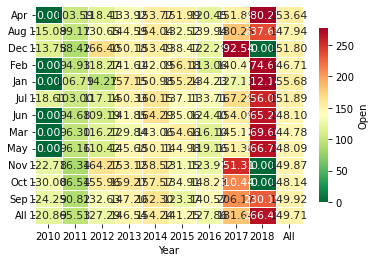

In [35]:
ax = sns.heatmap(all_month_year_data, cmap='RdYlGn_r', robust=True, fmt='.2f', 
                 annot=True, linewidths=.5, annot_kws={'size':11}, 
                 cbar_kws={'shrink':.8, 'label':'Open'})

### Model Preparation

In [36]:
scaler = MinMaxScaler(feature_range=(0,1))
data_close = scaler.fit_transform(np.array(data_close).reshape(-1,1))
print(data_close)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


### Train-Test Split

In [37]:
train_size = int(len(data_close)*0.70)
test_size = len(data_close) - train_size
train_data, test_data = data_close[0:train_size,:], data_close[train_size:, :1]
train_size, test_size

(1424, 611)

In [38]:
def dataset_creation(data, time_seq=1):
  X_data, y_data = [], []
  for i in range(len(data)-time_seq-1):
    lst = data[i:(i+time_seq), 0]
    X_data.append(lst)
    y_data.append(data[i + time_seq, 0])
  return np.array(X_data), np.array(y_data)

In [39]:
time_seq = 100
X_train, y_train = dataset_creation(train_data, time_seq)
X_test, y_test = dataset_creation(test_data, time_seq)
print(X_train.shape, y_train.shape)

(1323, 100) (1323,)


In [40]:
print(X_test.shape, y_test.shape)

(510, 100) (510,)


### Building Stacked LSTM Model

In [41]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### Model Instantiation

In [42]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(X_train,y_train, validation_data=(X_test, y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 22s 329ms/step - loss: 0.0294 - val_loss: 0.0043
Epoch 2/100
21/21 [==============================] - 5s 240ms/step - loss: 0.0032 - val_loss: 0.0012
Epoch 3/100
21/21 [==============================] - 5s 238ms/step - loss: 0.0017 - val_loss: 9.6784e-04
Epoch 4/100
21/21 [==============================] - 5s 244ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 5/100
21/21 [==============================] - 5s 246ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 6/100
21/21 [==============================] - 5s 241ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 7/100
21/21 [==============================] - 5s 238ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 8/100
21/21 [==============================] - 5s 240ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 9/100
21/21 [==============================] - 5s 238ms/step - loss: 0.0011 - val_loss: 9.2820e-04
Epoch 10/100
21/21 [==============================] - 5s 239ms/step - loss: 0.0011

21/21 [==============================] - 6s 273ms/step - loss: 2.9883e-04 - val_loss: 4.1017e-04
Epoch 77/100
21/21 [==============================] - 6s 267ms/step - loss: 3.2351e-04 - val_loss: 3.0356e-04
Epoch 78/100
21/21 [==============================] - 6s 286ms/step - loss: 3.8957e-04 - val_loss: 2.8170e-04
Epoch 79/100
21/21 [==============================] - 6s 272ms/step - loss: 3.1014e-04 - val_loss: 3.2653e-04
Epoch 80/100
21/21 [==============================] - 6s 274ms/step - loss: 2.8577e-04 - val_loss: 3.1171e-04
Epoch 81/100
21/21 [==============================] - 6s 276ms/step - loss: 3.0759e-04 - val_loss: 2.7874e-04
Epoch 82/100
21/21 [==============================] - 6s 266ms/step - loss: 2.7790e-04 - val_loss: 3.2682e-04
Epoch 83/100
21/21 [==============================] - 6s 267ms/step - loss: 2.9492e-04 - val_loss: 3.8045e-04
Epoch 84/100
21/21 [==============================] - 6s 271ms/step - loss: 2.7796e-04 - val_loss: 3.2408e-04
Epoch 85/100
21/21 [===

In [45]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [46]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)

In [47]:
math.sqrt(mean_squared_error(y_train, train_pred))

162.85657386786033

In [48]:
math.sqrt(mean_squared_error(y_test, test_pred))

108.08369890964326

### Plotting the predictions

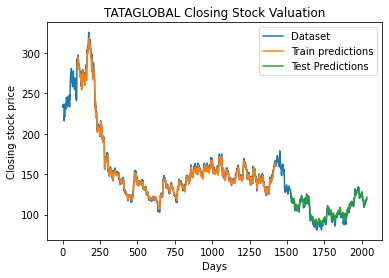

In [49]:
look_back = 100
trainPredPlot = np.empty_like(data_close)
trainPredPlot[:, :] = np.nan
trainPredPlot[look_back:len(train_pred) + look_back, :] = train_pred

testPredPlot = np.empty_like(data_close)
testPredPlot[:, :] = np.nan
testPredPlot[len(train_pred) + (look_back*2) + 1 : len(data_close) - 1, :] = test_pred

plt.plot(scaler.inverse_transform(data_close))
plt.plot(trainPredPlot)
plt.plot(testPredPlot)
plt.xlabel('Days')
plt.ylabel('Closing stock price')
plt.title('TATAGLOBAL Closing Stock Valuation')
plt.legend(['Dataset','Train predictions', 'Test Predictions'],loc='best')
plt.show();

### Predicting stock Price for next 100 days

In [50]:
len(test_data)

611

In [51]:
x_input = test_data[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [52]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [53]:
lst_out = []
n_steps = 100
i = 0
while(i<100):
  if(len(temp_input) > 100):
    x_input = np.array(temp_input[1:])
    print(f"{i} day input {x_input}")
    x_input = x_input.reshape(1, -1)
    x_input = x_input.reshape((1, n_steps, 1))
    pred = model.predict(x_input, verbose=0)
    print(f"{i} day input {pred}")
    temp_input.extend(pred[0].tolist())
    temp_input = temp_input[1:]
    lst_out.extend(pred.tolist())
    i += 1
  else:
    x_input = x_input.reshape((1, n_steps, 1))
    pred = model.predict(x_input, verbose=0)
    print(pred[0])
    temp_input.extend(pred[0].tolist())
    print(len(temp_input))
    lst_out.extend(pred.tolist())
    i += 1

print(lst_out)

[0.16438818]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

8 day input [[0.16923457]]
9 day input [0.12867647 0.11846405 0.14644608 0.14808007 0.15910948 0.15992647
 0.15788399 0.16441993 0.17892157 0.17933007 0.19260621 0.20812908
 0.18974673 0.18055556 0.18239379 0.17708333 0.17810458 0.18055556
 0.17810458 0.17851307 0.19607843 0.18913399 0.18954248 0.19403595
 0.19444444 0.20200163 0.19771242 0.19934641 0.19873366 0.1997549
 0.2128268  0.21568627 0.20445261 0.21772876 0.21098856 0.21425654
 0.19750817 0.18811275 0.17851307 0.17381536 0.16033497 0.16564542
 0.17116013 0.17422386 0.18035131 0.17401961 0.16278595 0.16973039
 0.17810458 0.17034314 0.16830065 0.17279412 0.17544935 0.18382353
 0.19138072 0.18913399 0.19097222 0.17238562 0.16830065 0.1693219
 0.17177288 0.16156046 0.14971405 0.1503268  0.15196078 0.14726307
 0.14501634 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768
 0.12377451 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046
 0.12724673 0.13521242 0.14522059 0.15257353 0.14848856 0.14338235
 0.14562908 0.15236928 0.1

16 day input [[0.17184529]]
17 day input [0.17892157 0.17933007 0.19260621 0.20812908 0.18974673 0.18055556
 0.18239379 0.17708333 0.17810458 0.18055556 0.17810458 0.17851307
 0.19607843 0.18913399 0.18954248 0.19403595 0.19444444 0.20200163
 0.19771242 0.19934641 0.19873366 0.1997549  0.2128268  0.21568627
 0.20445261 0.21772876 0.21098856 0.21425654 0.19750817 0.18811275
 0.17851307 0.17381536 0.16033497 0.16564542 0.17116013 0.17422386
 0.18035131 0.17401961 0.16278595 0.16973039 0.17810458 0.17034314
 0.16830065 0.17279412 0.17544935 0.18382353 0.19138072 0.18913399
 0.19097222 0.17238562 0.16830065 0.1693219  0.17177288 0.16156046
 0.14971405 0.1503268  0.15196078 0.14726307 0.14501634 0.14603758
 0.12479575 0.13112745 0.11397059 0.1190768  0.12377451 0.13562092
 0.12908497 0.13459967 0.12806373 0.13031046 0.12724673 0.13521242
 0.14522059 0.15257353 0.14848856 0.14338235 0.14562908 0.15236928
 0.15400327 0.14971405 0.1621732  0.16319444 0.16584967 0.16438818
 0.16633752 0.1672188

26 day input [[0.17442739]]
27 day input [0.17810458 0.17851307 0.19607843 0.18913399 0.18954248 0.19403595
 0.19444444 0.20200163 0.19771242 0.19934641 0.19873366 0.1997549
 0.2128268  0.21568627 0.20445261 0.21772876 0.21098856 0.21425654
 0.19750817 0.18811275 0.17851307 0.17381536 0.16033497 0.16564542
 0.17116013 0.17422386 0.18035131 0.17401961 0.16278595 0.16973039
 0.17810458 0.17034314 0.16830065 0.17279412 0.17544935 0.18382353
 0.19138072 0.18913399 0.19097222 0.17238562 0.16830065 0.1693219
 0.17177288 0.16156046 0.14971405 0.1503268  0.15196078 0.14726307
 0.14501634 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768
 0.12377451 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046
 0.12724673 0.13521242 0.14522059 0.15257353 0.14848856 0.14338235
 0.14562908 0.15236928 0.15400327 0.14971405 0.1621732  0.16319444
 0.16584967 0.16438818 0.16633752 0.16721889 0.16766846 0.1679906
 0.1682899  0.16859394 0.16890857 0.16923457 0.16956979 0.16991028
 0.17025113 0.17058796 0.

34 day input [[0.17603472]]
35 day input [0.19771242 0.19934641 0.19873366 0.1997549  0.2128268  0.21568627
 0.20445261 0.21772876 0.21098856 0.21425654 0.19750817 0.18811275
 0.17851307 0.17381536 0.16033497 0.16564542 0.17116013 0.17422386
 0.18035131 0.17401961 0.16278595 0.16973039 0.17810458 0.17034314
 0.16830065 0.17279412 0.17544935 0.18382353 0.19138072 0.18913399
 0.19097222 0.17238562 0.16830065 0.1693219  0.17177288 0.16156046
 0.14971405 0.1503268  0.15196078 0.14726307 0.14501634 0.14603758
 0.12479575 0.13112745 0.11397059 0.1190768  0.12377451 0.13562092
 0.12908497 0.13459967 0.12806373 0.13031046 0.12724673 0.13521242
 0.14522059 0.15257353 0.14848856 0.14338235 0.14562908 0.15236928
 0.15400327 0.14971405 0.1621732  0.16319444 0.16584967 0.16438818
 0.16633752 0.16721889 0.16766846 0.1679906  0.1682899  0.16859394
 0.16890857 0.16923457 0.16956979 0.16991028 0.17025113 0.17058796
 0.17091727 0.17123696 0.17154631 0.17184529 0.17213473 0.17241552
 0.17268866 0.1729550

43 day input [[0.17737249]]
44 day input [0.21425654 0.19750817 0.18811275 0.17851307 0.17381536 0.16033497
 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961 0.16278595
 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412 0.17544935
 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562 0.16830065
 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268  0.15196078
 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745 0.11397059
 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967 0.12806373
 0.13031046 0.12724673 0.13521242 0.14522059 0.15257353 0.14848856
 0.14338235 0.14562908 0.15236928 0.15400327 0.14971405 0.1621732
 0.16319444 0.16584967 0.16438818 0.16633752 0.16721889 0.16766846
 0.1679906  0.1682899  0.16859394 0.16890857 0.16923457 0.16956979
 0.16991028 0.17025113 0.17058796 0.17091727 0.17123696 0.17154631
 0.17184529 0.17213473 0.17241552 0.17268866 0.17295504 0.17321509
 0.17346928 0.17371765 0.17396027 0.17419684 0.17442739 0.17465147
 0.17486909 0.17508   

52 day input [[0.17832941]]
53 day input [0.18035131 0.17401961 0.16278595 0.16973039 0.17810458 0.17034314
 0.16830065 0.17279412 0.17544935 0.18382353 0.19138072 0.18913399
 0.19097222 0.17238562 0.16830065 0.1693219  0.17177288 0.16156046
 0.14971405 0.1503268  0.15196078 0.14726307 0.14501634 0.14603758
 0.12479575 0.13112745 0.11397059 0.1190768  0.12377451 0.13562092
 0.12908497 0.13459967 0.12806373 0.13031046 0.12724673 0.13521242
 0.14522059 0.15257353 0.14848856 0.14338235 0.14562908 0.15236928
 0.15400327 0.14971405 0.1621732  0.16319444 0.16584967 0.16438818
 0.16633752 0.16721889 0.16766846 0.1679906  0.1682899  0.16859394
 0.16890857 0.16923457 0.16956979 0.16991028 0.17025113 0.17058796
 0.17091727 0.17123696 0.17154631 0.17184529 0.17213473 0.17241552
 0.17268866 0.17295504 0.17321509 0.17346928 0.17371765 0.17396027
 0.17419684 0.17442739 0.17465147 0.17486909 0.17508    0.17528427
 0.1754818  0.17567268 0.17585692 0.17603472 0.17620623 0.1763716
 0.17653099 0.17668462

61 day input [[0.17901587]]
62 day input [0.18382353 0.19138072 0.18913399 0.19097222 0.17238562 0.16830065
 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268  0.15196078
 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745 0.11397059
 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967 0.12806373
 0.13031046 0.12724673 0.13521242 0.14522059 0.15257353 0.14848856
 0.14338235 0.14562908 0.15236928 0.15400327 0.14971405 0.1621732
 0.16319444 0.16584967 0.16438818 0.16633752 0.16721889 0.16766846
 0.1679906  0.1682899  0.16859394 0.16890857 0.16923457 0.16956979
 0.16991028 0.17025113 0.17058796 0.17091727 0.17123696 0.17154631
 0.17184529 0.17213473 0.17241552 0.17268866 0.17295504 0.17321509
 0.17346928 0.17371765 0.17396027 0.17419684 0.17442739 0.17465147
 0.17486909 0.17508    0.17528427 0.1754818  0.17567268 0.17585692
 0.17603472 0.17620623 0.1763716  0.17653099 0.17668462 0.17683262
 0.17697519 0.17711261 0.17724496 0.17737249 0.17749533 0.17761365
 0.17772767 0.17783746

69 day input [[0.17946288]]
70 day input [0.16156046 0.14971405 0.1503268  0.15196078 0.14726307 0.14501634
 0.14603758 0.12479575 0.13112745 0.11397059 0.1190768  0.12377451
 0.13562092 0.12908497 0.13459967 0.12806373 0.13031046 0.12724673
 0.13521242 0.14522059 0.15257353 0.14848856 0.14338235 0.14562908
 0.15236928 0.15400327 0.14971405 0.1621732  0.16319444 0.16584967
 0.16438818 0.16633752 0.16721889 0.16766846 0.1679906  0.1682899
 0.16859394 0.16890857 0.16923457 0.16956979 0.16991028 0.17025113
 0.17058796 0.17091727 0.17123696 0.17154631 0.17184529 0.17213473
 0.17241552 0.17268866 0.17295504 0.17321509 0.17346928 0.17371765
 0.17396027 0.17419684 0.17442739 0.17465147 0.17486909 0.17508
 0.17528427 0.1754818  0.17567268 0.17585692 0.17603472 0.17620623
 0.1763716  0.17653099 0.17668462 0.17683262 0.17697519 0.17711261
 0.17724496 0.17737249 0.17749533 0.17761365 0.17772767 0.17783746
 0.17794335 0.17804527 0.17814344 0.17823815 0.17832941 0.17841735
 0.17850211 0.17858383 0.

78 day input [[0.17983225]]
79 day input [0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0.13521242 0.14522059 0.15257353
 0.14848856 0.14338235 0.14562908 0.15236928 0.15400327 0.14971405
 0.1621732  0.16319444 0.16584967 0.16438818 0.16633752 0.16721889
 0.16766846 0.1679906  0.1682899  0.16859394 0.16890857 0.16923457
 0.16956979 0.16991028 0.17025113 0.17058796 0.17091727 0.17123696
 0.17154631 0.17184529 0.17213473 0.17241552 0.17268866 0.17295504
 0.17321509 0.17346928 0.17371765 0.17396027 0.17419684 0.17442739
 0.17465147 0.17486909 0.17508    0.17528427 0.1754818  0.17567268
 0.17585692 0.17603472 0.17620623 0.1763716  0.17653099 0.17668462
 0.17683262 0.17697519 0.17711261 0.17724496 0.17737249 0.17749533
 0.17761365 0.17772767 0.17783746 0.17794335 0.17804527 0.17814344
 0.17823815 0.17832941 0.17841735 0.17850211 0.17858383 0.17866257
 0.17873853 0.17881173 0.17888221 0.17895031 0.17901587 0.17907915
 0.17914015 0.1791988

87 day input [[0.1800985]]
88 day input [0.13521242 0.14522059 0.15257353 0.14848856 0.14338235 0.14562908
 0.15236928 0.15400327 0.14971405 0.1621732  0.16319444 0.16584967
 0.16438818 0.16633752 0.16721889 0.16766846 0.1679906  0.1682899
 0.16859394 0.16890857 0.16923457 0.16956979 0.16991028 0.17025113
 0.17058796 0.17091727 0.17123696 0.17154631 0.17184529 0.17213473
 0.17241552 0.17268866 0.17295504 0.17321509 0.17346928 0.17371765
 0.17396027 0.17419684 0.17442739 0.17465147 0.17486909 0.17508
 0.17528427 0.1754818  0.17567268 0.17585692 0.17603472 0.17620623
 0.1763716  0.17653099 0.17668462 0.17683262 0.17697519 0.17711261
 0.17724496 0.17737249 0.17749533 0.17761365 0.17772767 0.17783746
 0.17794335 0.17804527 0.17814344 0.17823815 0.17832941 0.17841735
 0.17850211 0.17858383 0.17866257 0.17873853 0.17881173 0.17888221
 0.17895031 0.17901587 0.17907915 0.17914015 0.17919889 0.1792556
 0.17931029 0.17936301 0.17941386 0.17946288 0.17951015 0.17955571
 0.17959964 0.17964208 0.17

 0.18019161 0.1802128  0.18023324 0.180253  ]
95 day input [[0.18027204]]
96 day input [0.14971405 0.1621732  0.16319444 0.16584967 0.16438818 0.16633752
 0.16721889 0.16766846 0.1679906  0.1682899  0.16859394 0.16890857
 0.16923457 0.16956979 0.16991028 0.17025113 0.17058796 0.17091727
 0.17123696 0.17154631 0.17184529 0.17213473 0.17241552 0.17268866
 0.17295504 0.17321509 0.17346928 0.17371765 0.17396027 0.17419684
 0.17442739 0.17465147 0.17486909 0.17508    0.17528427 0.1754818
 0.17567268 0.17585692 0.17603472 0.17620623 0.1763716  0.17653099
 0.17668462 0.17683262 0.17697519 0.17711261 0.17724496 0.17737249
 0.17749533 0.17761365 0.17772767 0.17783746 0.17794335 0.17804527
 0.17814344 0.17823815 0.17832941 0.17841735 0.17850211 0.17858383
 0.17866257 0.17873853 0.17881173 0.17888221 0.17895031 0.17901587
 0.17907915 0.17914015 0.17919889 0.1792556  0.17931029 0.17936301
 0.17941386 0.17946288 0.17951015 0.17955571 0.17959964 0.17964208
 0.17968288 0.17972231 0.17976028 0.1797969

In [54]:
day_new = np.arange(1,101)
day_pred = np.arange(101,201)

In [55]:
len(data_close)

2035

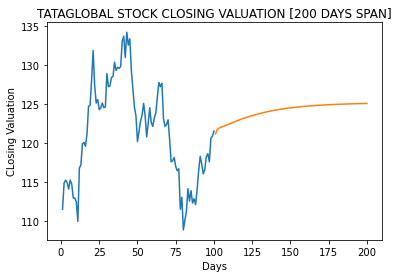

In [56]:
plt.plot(day_new, scaler.inverse_transform(data_close[1935:]))
plt.plot(day_pred, scaler.inverse_transform(lst_out))
plt.xlabel('Days')
plt.ylabel('CLosing Valuation')
plt.title('TATAGLOBAL STOCK CLOSING VALUATION [200 DAYS SPAN]');

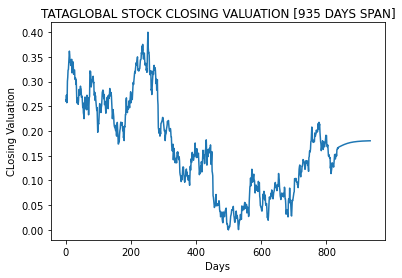

In [57]:
data_final = data_close.tolist()
data_final.extend(lst_out)
plt.plot(data_final[1200:])
plt.xlabel('Days')
plt.ylabel('CLosing Valuation')
plt.title('TATAGLOBAL STOCK CLOSING VALUATION [935 DAYS SPAN]');

In [58]:
data_final = scaler.inverse_transform(data_final).tolist()

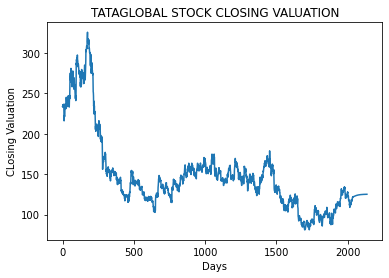

In [59]:
plt.plot(data_final)
plt.xlabel('Days')
plt.ylabel('CLosing Valuation')
plt.title('TATAGLOBAL STOCK CLOSING VALUATION');